In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
#get the data
df = pd.read_csv('/home/Machine Learning/week-12/Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values

In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
object_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

In [14]:
object_columns

Index(['Genre'], dtype='object')

In [15]:
numerical_columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [17]:
df = pd.get_dummies(df, drop_first=True)
df.head(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0


In [18]:
from sklearn.cluster import KMeans

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [20]:
wcss

[975512.06,
 387065.71377137717,
 271396.5629660315,
 195401.19855991463,
 157157.7579059829,
 122625.38919480512,
 105192.97703222705,
 86146.21762410294,
 76917.61588179089,
 68900.88594790666]

Text(0, 0.5, 'WCSS')

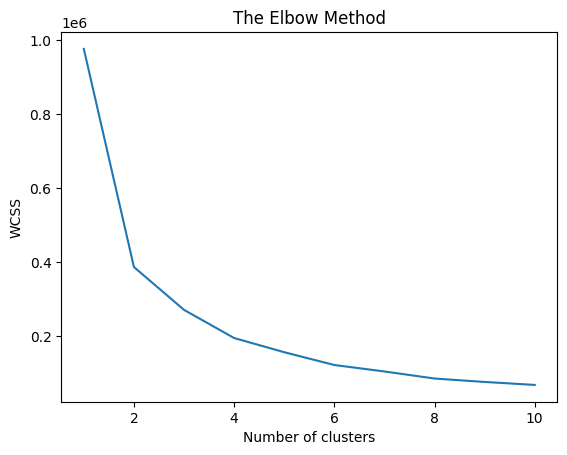

In [21]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')